## ResNet50

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
cifar10 = keras.datasets.cifar10

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

In [4]:
import matplotlib.pyplot as plt

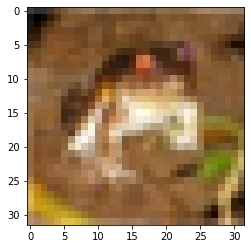

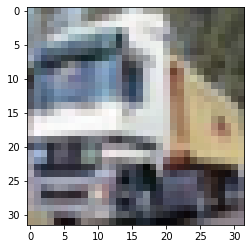

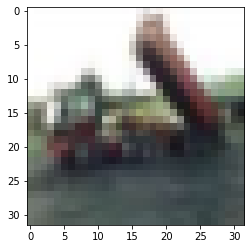

In [5]:
for image, label in train_dataset.take(3):
  plt.figure()
  plt.imshow(image)

In [6]:
IMG_SIZE = 160

In [7]:
def change_format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [8]:
train_dataset = train_dataset.map(change_format)
test_dataset = test_dataset.map(change_format)

In [9]:
train_dataset = train_dataset.shuffle(10000).batch(64)
test_dataset = test_dataset.batch(64)

### ResNet50 구성

In [10]:
resnet50 = keras.applications.ResNet50(weights=None,
                                       input_shape=(160, 160, 3))

In [11]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [12]:
model = keras.applications.ResNet50(include_top=False,
                                    weights=None,
                                    input_shape=(160, 160, 3))

In [13]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [14]:
new_model = keras.Sequential()
new_model.add(model)
new_model.add(keras.layers.GlobalAveragePooling2D())
new_model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [16]:
new_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [17]:
new_model.fit(train_dataset, epochs=10)

Epoch 1/10
782/782 [==============================] - 101s 129ms/step - loss: 1.5707 - accuracy: 0.4490
Epoch 2/10
782/782 [==============================] - 101s 129ms/step - loss: 1.0158 - accuracy: 0.6384
Epoch 3/10
782/782 [==============================] - 101s 129ms/step - loss: 0.7914 - accuracy: 0.7253
Epoch 4/10
782/782 [==============================] - 101s 129ms/step - loss: 0.6651 - accuracy: 0.7701
Epoch 5/10
782/782 [==============================] - 101s 129ms/step - loss: 0.5814 - accuracy: 0.8007
Epoch 6/10
782/782 [==============================] - 101s 129ms/step - loss: 0.4640 - accuracy: 0.8402
Epoch 7/10
782/782 [==============================] - 101s 129ms/step - loss: 0.3971 - accuracy: 0.8618
Epoch 8/10
782/782 [==============================] - 101s 129ms/step - loss: 0.3222 - accuracy: 0.8871
Epoch 9/10
782/782 [==============================] - 101s 129ms/step - loss: 0.2637 - accuracy: 0.9065
Epoch 10/10
782/782 [==============================] - 101s 129m